# Requirements

In [58]:

# pip install pycocotools
# pip install scikit-image


# Imports

In [78]:

from pycocotools.coco import COCO
import numpy as np

from typing import List, Dict, Any

import requests
import os
import zipfile
import skimage.io as io
import matplotlib.pyplot as plt


# CocoDatasetClient

In [147]:

class CocoDatasetClient:
    def __init__(self) -> None:
        self.image_url = "http://images.cocodataset.org/zips/train2017.zip"
        self.annotation_url = "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"
        self.image_zip_file = "data/train2017.zip"
        self.annotation_zip_file = "data/annotations_trainval2017.zip"
    
    # TODO: Method download_images downloads not a valid ZIP archive
    def download_images(self) -> None:
        count = 0 
        
        if not os.path.exists(self.image_zip_file):
            r = requests.get(self.image_url, stream=True)
            
            with open(self.image_zip_file, 'wb') as f:
                print("Downlading started")
                
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)
                    
                    # keep track
                    count = count + 1
                    if count % 100 == 0:
                        print(count)

    def download_annotations(self) -> None:
        count = 0 
        
        if not os.path.exists(self.annotation_zip_file):
            r = requests.get(self.annotation_url, stream=True)
            
            with open(self.annotation_zip_file, 'wb') as f:
                print("Downlading started")
                
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)

                    # keep track
                    count = count + 1
                    if count % 100 == 0:
                        print(count)
                    
    def extract_images(self) -> None:
        with zipfile.ZipFile(self.image_zip_file, 'r') as zip_ref:
            zip_ref.extractall()

    def extract_annotations(self) -> None:
        with zipfile.ZipFile(self.annotation_zip_file, 'r') as zip_ref:
            zip_ref.extractall('data/')
            
class CocoApi:    
    def load_annotations(self, path: str) -> None:
        return COCO(path)
    
    def get_annotations_categories(self, annotations) -> None:
        """
        Use this method for instances & person keypoints annotations.
        """
        
        cats = annotations.loadCats(annotations.getCatIds())
        
        nms=[cat['name'] for cat in cats]
        
        print('COCO categories: \n{}\n'.format(' '.join(nms)))
        
        nms = set([cat['supercategory'] for cat in cats])
        print('COCO supercategories: \n{}'.format(' '.join(nms)))
        
    def get_images_by_categories(self, annotations, categories: list()) -> Dict[str, Dict[str, Any]]:
        """
        Use this method for instances & person keypoints annotations.
        """
            
        # get all images containing given categories, select one at random
        cat_ids = coco.getCatIds(catNms=categories)
        
        img_ids = coco.getImgIds(catIds=cat_ids)
    
        images = {}

        for img_id in img_ids:
            images[str(img_id)] = annotations.loadImgs(img_id)[0]
            # {img_id: annotations.loadImgs(img_id)[0]}
            #images.append(annotations.loadImgs(img_id)[0])
            #images.append({str(img_id): annotations.loadImgs(img_id)[0]})

        return images
    
    def get_images_by_image_id(self, annotations, image_id: int) -> None:
        """
        Use this method for captions annotations.
        """
            
        ann_ids = annotations.getAnnIds(imgIds=image_id)
        
        anns = annotations.loadAnns(ann_ids)
        
        return anns
    
    def show_image(self, url: str) -> None:
        I = io.imread(url)
        plt.axis('off')
        plt.imshow(I)
        plt.show()

coco_api = CocoApi()


# Download dataset

In [21]:

coco_dataset_client = CocoDatasetClient()


In [34]:

coco_dataset_client.download_images()


Downlading started
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
182

KeyboardInterrupt: 

In [38]:

coco_dataset_client.download_annotations()


Downlading started
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
182

In [14]:

# TODO: Method download_images downloads not a valid ZIP archive
# coco_dataset_client.extract_images()


In [22]:

coco_dataset_client.extract_annotations()


# Load data 

## Instances annotations

In [55]:

instances_annotations_path = "data/annotations/instances_train2017.json"
instances_annotations = coco_api.load_annotations(instances_annotations_path)


loading annotations into memory...
Done (t=162.59s)
creating index...
index created!


In [58]:

coco_api.get_annotations_categories(instances_annotations)


COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
sports electronic appliance outdoor kitchen food furniture vehicle accessory animal indoor person


In [153]:

instance_annotations_images = coco_api.get_images_by_categories(instances_annotations, ['cup','bowl','apple'])
instance_annotations_images


{'364032': {'license': 2,
  'file_name': '000000364032.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000364032.jpg',
  'height': 640,
  'width': 480,
  'date_captured': '2013-11-14 20:59:36',
  'flickr_url': 'http://farm8.staticflickr.com/7246/7728917580_838fbab7ae_z.jpg',
  'id': 364032},
 '113668': {'license': 3,
  'file_name': '000000113668.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000113668.jpg',
  'height': 427,
  'width': 640,
  'date_captured': '2013-11-22 03:38:55',
  'flickr_url': 'http://farm4.staticflickr.com/3215/3083833595_3978c432e2_z.jpg',
  'id': 113668},
 '103435': {'license': 1,
  'file_name': '000000103435.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000103435.jpg',
  'height': 478,
  'width': 640,
  'date_captured': '2013-11-20 01:08:06',
  'flickr_url': 'http://farm2.staticflickr.com/1437/5126143613_cd5f76d1a6_z.jpg',
  'id': 103435},
 '315411': {'license': 6,
  'file_name': '000000315411.jpg',
  'coco_url'

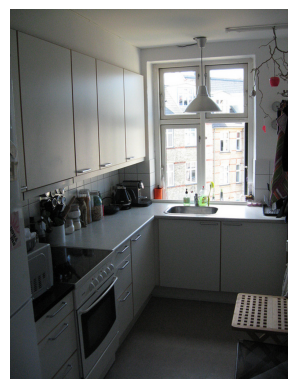

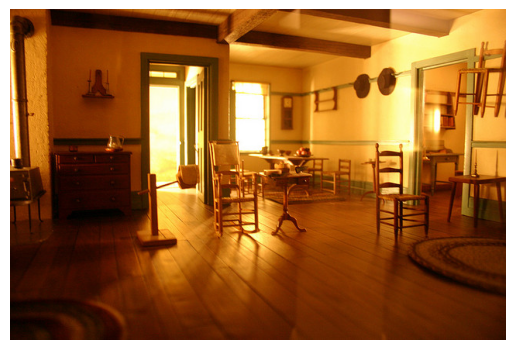

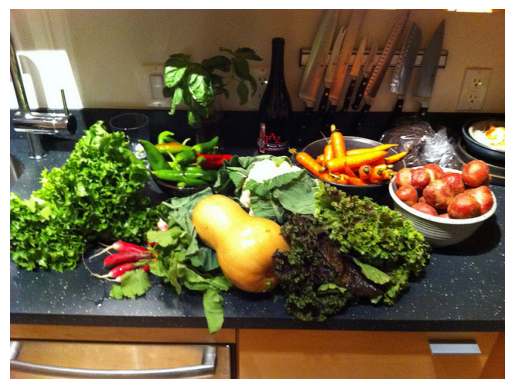

In [157]:

count = 0

for key, value in instance_annotations_images.items():
    if count < 3:
        coco_api.show_image(value['coco_url'])
    
    count = count + 1


## Person keypoints annotations

In [57]:

person_keypoints_annotations_path = "data/annotations/person_keypoints_train2017.json"
person_keypoints_annotations = coco_api.load_annotations(person_keypoints_annotations_path)


loading annotations into memory...
Done (t=138.87s)
creating index...
index created!


In [59]:

coco_api.get_annotations_categories(person_keypoints_annotations)


COCO categories: 
person

COCO supercategories: 
person


## Captions annotations

In [101]:

captions_annotations_path = "data/annotations/captions_train2017.json"
captions_annotations = coco_api.load_annotations(captions_annotations_path)


loading annotations into memory...
Done (t=1.50s)
creating index...
index created!


In [116]:

captions_annotations_images = []

for image in instance_annotations_images:
    captions_annotations_images.append(coco_api.get_images_by_image_id(captions_annotations, image['id']))


In [119]:

partial_captions_annotations_images = captions_annotations_images[:3]
partial_captions_annotations_images


[[{'image_id': 364032,
   'id': 288289,
   'caption': 'The view of a kitchen with a window that is opened slightly.'},
  {'image_id': 364032,
   'id': 289528,
   'caption': 'A stove and sink in a small kitchen.'},
  {'image_id': 364032,
   'id': 289933,
   'caption': 'A folding table sitting in a kitchen with a window behind the sink.'},
  {'image_id': 364032,
   'id': 295597,
   'caption': 'This is a white kitchen with a window.'},
  {'image_id': 364032,
   'id': 307213,
   'caption': 'a white kitchen a stove a window a sink and some cabinets'}],
 [{'image_id': 113668,
   'id': 12957,
   'caption': 'A large living room filled with wooden chairs.'},
  {'image_id': 113668,
   'id': 15183,
   'caption': 'A house with many carved wooden pieces of furniture.'},
  {'image_id': 113668,
   'id': 16509,
   'caption': 'Large beautifully designed country kitchen and dinning area in a home.'},
  {'image_id': 113668,
   'id': 17559,
   'caption': 'Inside of home with chairs and one chair hung on t

The view of a kitchen with a window that is opened slightly.
A stove and sink in a small kitchen.
A folding table sitting in a kitchen with a window behind the sink.
This is a white kitchen with a window.
a white kitchen a stove a window a sink and some cabinets


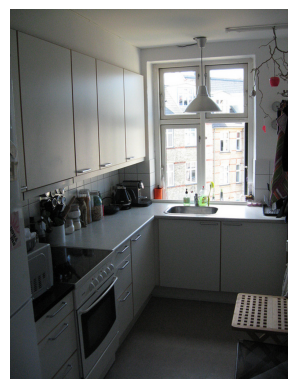

A large living room filled with wooden chairs.
A house with many carved wooden pieces of furniture.
Large beautifully designed country kitchen and dinning area in a home.
Inside of home with chairs and one chair hung on the wall.
A large room with several empty tables and open door


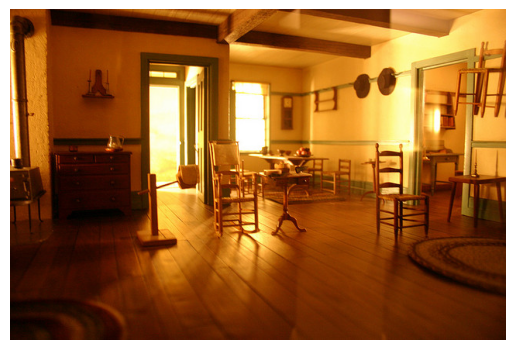

A kitchen counter top filled with fresh fruits and vegetables.
A counter top filled with colorful vegetables, some in bowls.
bowls filled with squash tomatoes carrots radishes and letuce
A kitchen counter full of freshly picked vegetables.
Fresh vegetables and wine are spread across a counter.


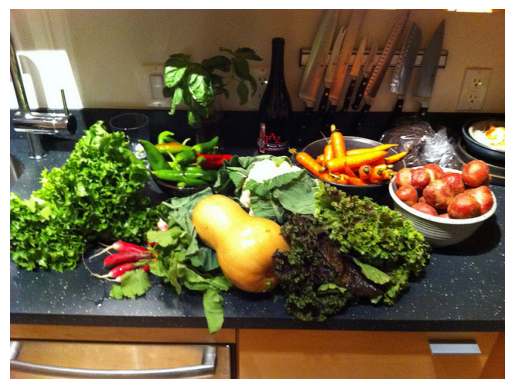

In [163]:

for image in partial_captions_annotations_images:
    captions_annotations.showAnns(image)
    
    image_id = image[0]['image_id']

    image_url = instance_annotations_images[str(image_id)]['coco_url']

    coco_api.show_image(image_url)
